## Aperçu du projet
Pour ce projet, nous utiliserons le nettoyage, l’imputation, l’analyse et la visualisation des données pour générer des informations pour une partie prenante de l’entreprise.
## Problème commercial
Une entreprise se développe dans de nouveaux secteurs afin de diversifier son portefeuille. Elle souhaite notamment acquérir et exploiter des avions pour des entreprises commerciales et privées, mais ignore les risques potentiels liés à l'aviation.Je suis chargé(e) d'identifier les avions présentant le moins de risques pour l'entreprise lors du lancement de cette nouvelle activité. Je dois ensuite traduire mes conclusions en informations exploitables que le responsable de la nouvelle division aéronautique pourra utiliser pour l'aider à choisir les avions à acquérir.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('AviationData.csv',encoding='latin-1', low_memory=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Dataset Aviation
Le dataset comprend des données sur les accidents d'aviation de 1962 à 2023 concernant les accidents de l'aviation civile et certains incidents aux États-Unis et dans les eaux internationales.

In [3]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Preparation de donnees
### Nettoyage de donnees
Pour le dataset, je les rends plus faciles à utiliser  en supprimant les coloones non utilisees.

In [4]:
#supprimer les colonnes totalement vides
df.dropna(axis=1, how='all', inplace=True)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
#Supprimer les colonnes non necessaire
data = df.drop(columns = ['Event.Id','Investigation.Type','Accident.Number','Location','Country','Latitude','Longitude','Airport.Code','Airport.Name','Registration.Number','Schedule','Air.carrier','Broad.phase.of.flight','Report.Status','FAR.Description','Amateur.Built'])

In [6]:
#fusionner make et model
if 'Make' in df.columns and 'Model' in df.columns:
    data['avionmodel'] = data['Make'].astype(str) + ' ' + data['Model'].astype(str)
else:
    data['avionmodel'] = data.get('Model','unknown')

In [7]:
data

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date,avionmodel
0,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,NaN,Stinson 108-3
1,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,19-09-1996,Piper PA24-180
2,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,26-02-2007,Cessna 172M
3,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,12-09-2000,Rockwell 112
4,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,16-04-1980,Cessna 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,29-12-2022,PIPER PA-28-151
88885,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,BELLANCA 7ECA
88886,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,27-12-2022,AMERICAN CHAMPION AIRCRAFT 8GCBC
88887,2022-12-26,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,CESSNA 210N


In [8]:
#nettoyage des donnees manquantes
data = data.dropna(subset=['avionmodel'])
data

,Event.Date,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Publication.Date,avionmodel
0,1948-10-24,Fatal(2),Destroyed,NaN,Stinson,108-3,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,UNK,NaN,Stinson 108-3
1,1962-07-19,Fatal(4),Destroyed,NaN,Piper,PA24-180,1.0,Reciprocating,Personal,4.0,0.0,0.0,0.0,UNK,19-09-1996,Piper PA24-180
2,1974-08-30,Fatal(3),Destroyed,NaN,Cessna,172M,1.0,Reciprocating,Personal,3.0,NaN,NaN,NaN,IMC,26-02-2007,Cessna 172M
3,1977-06-19,Fatal(2),Destroyed,NaN,Rockwell,112,1.0,Reciprocating,Personal,2.0,0.0,0.0,0.0,IMC,12-09-2000,Rockwell 112
4,1979-08-02,Fatal(1),Destroyed,NaN,Cessna,501,NaN,NaN,Personal,1.0,2.0,NaN,0.0,VMC,16-04-1980,Cessna 501
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,2022-12-26,Minor,NaN,NaN,PIPER,PA-28-151,NaN,NaN,Personal,0.0,1.0,0.0,0.0,NaN,29-12-2022,PIPER PA-28-151
88885,2022-12-26,NaN,NaN,NaN,BELLANCA,7ECA,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,BELLANCA 7ECA
88886,2022-12-26,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,1.0,NaN,Personal,0.0,0.0,0.0,1.0,VMC,27-12-2022,AMERICAN CHAMPION AIRCRAFT 8GCBC
88887,2022-12-26,NaN,NaN,NaN,CESSNA,210N,NaN,NaN,Personal,0.0,0.0,0.0,0.0,NaN,NaN,CESSNA 210N


In [9]:
#analyse
accident_model = data['avionmodel'].value_counts()
accident_model

Cessna 152                        2168
Cessna 172                        1254
Cessna 172N                        996
Piper PA-28-140                    812
Cessna 150                         716
                                  ... 
Winn RV-6A                           1
Owens/richburg VANS RV6-A            1
Huntington KIS                       1
DIAMOND AIRCRAFT IND INC DA 62       1
Rally Rotec 2B                       1
Name: avionmodel, Length: 20183, dtype: int64

In [14]:
#Accident par annee
data['year'] = data['Event.Date'].dt.year
accidents_year =data.groupby('year').size()

AttributeError: Can only use .dt accessor with datetimelike values

In [10]:
#analyse injury
if 'Injury.Severity' in data.columns:
    graves = data[data['Injury.Severity'].str.contains('Fatal|Serious', na=False)]
    accidents_grave = graves['avionmodel'].value_counts()
else:
    accidents_graves = pd.series(dtype=int)

In [11]:
risque = pd.DataFrame({
    'total_accidents':accident_model,
    'accidents_graves':accidents_grave
}).fillna(0)
#Calcul pourcentage de la gravite d'un accident
risque['taux_gravite'] = 100 * risque['accidents_graves'] / risque['total_accidents']
risque = risque.sort_values(by='taux_gravite')
risque

,total_accidents,accidents_graves,taux_gravite
British Aerospace BAE-146-300,1,0.0,0.0
Fairchild Swearingen SA226T,1,0.0,0.0
Pzl Warzawa-okecie PZL-104 WILGA 80,1,0.0,0.0
Fairchild Swearingen SA-227AC,1,0.0,0.0
Boeing 767-231,2,0.0,0.0
...,...,...,...
Daniel L Patrick Kolb Mark,1,1.0,100.0
Daniel J. Zoerb KITFOX,1,1.0,100.0
Daniel J. Lee Express 90,1,1.0,100.0
Dangremond CHALLENGER II,1,1.0,100.0


In [12]:
top_avions = risque[risque['total_accidents'] >=5].head(10)
top_avions

,total_accidents,accidents_graves,taux_gravite
Mcdonnell Douglas DC-9,5,0.0,0.000000
Mcdonnell Douglas DC-10-40,7,0.0,0.000000
Boeing 747-123,7,0.0,0.000000
Boeing 737-130,6,0.0,0.000000
Boeing 737-3B7,6,0.0,0.000000
Douglas DC-9-51,7,0.0,0.000000
Douglas DC-8-71,5,0.0,0.000000
Airbus Industrie A300-600,8,0.0,0.000000
Boeing 727-231,9,1.0,11.111111
Mcdonnell Douglas DC-10,8,1.0,12.500000


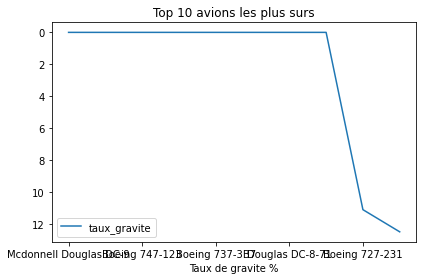

In [13]:
top_avions.plot(y='taux_gravite', title='Top 10 avions les plus surs')
plt.xlabel('Taux de gravite %')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
